In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

In [35]:
input_path = 'data/image_new/images/weather_100.npy'

arr = np.load(input_path)
print(arr.shape, arr.dtype)

(700, 875) float16


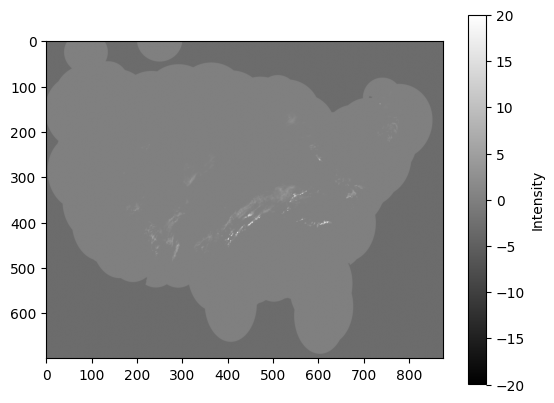

In [36]:
plt.imshow(arr, cmap="gray", vmin=-20, vmax=20)   # or "viridis", "coolwarm"
plt.colorbar(label="Intensity")
plt.show()

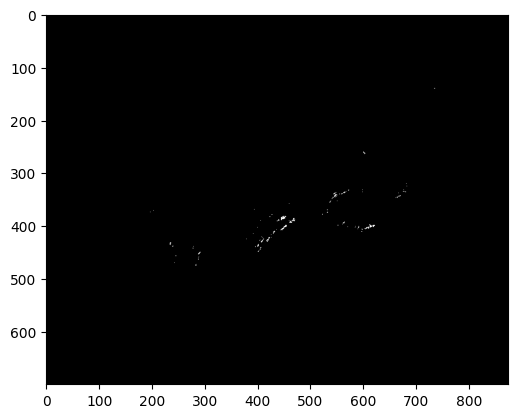

In [37]:
mask = np.where(arr >= 5, 255, 0)

plt.imshow(mask, cmap='gray')
plt.show()

In [38]:
scaled_mask = mask.astype(np.uint8)
scaled_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(700, 875), dtype=uint8)

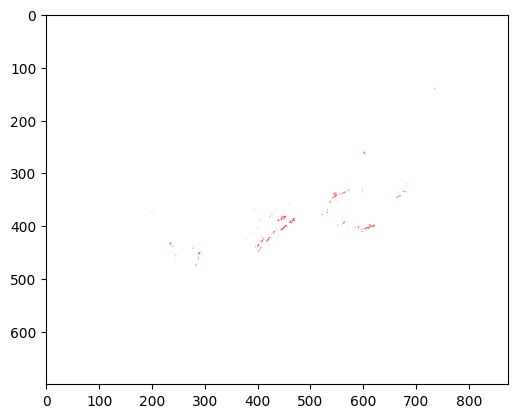

In [39]:
contours, _ = cv2.findContours(scaled_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

blank_img = np.ones(list(mask.shape) + [3], dtype=np.uint8) * 255
cv2.drawContours(image=blank_img, contours=contours, contourIdx=-1, color=(255, 0, 0))

plt.imshow(blank_img)
plt.show()

In [40]:
simplified_contours = []

for contour in contours:
    # print(f"Contour: {contour[:3]}")
    try:
        epsilon = math.log(cv2.contourArea(contour))
        # print(f"Epsilon = {epsilon}")

        if epsilon < 0:
            raise ValueError(f"area < 1")
    except:
        # print(f"⚠️ Error at {contour}")
        # print(f"---")
        continue

    simplified_contour = cv2.approxPolyDP(contour, epsilon, True)
    print(f"Number of vertices before simplified = {len(contour)}")
    print(f"Number of vertices after simplified = {len(simplified_contour)}")
    print(f"---")

    simplified_contours.append(simplified_contour)

Number of vertices before simplified = 7
Number of vertices after simplified = 2
---
Number of vertices before simplified = 7
Number of vertices after simplified = 2
---
Number of vertices before simplified = 8
Number of vertices after simplified = 3
---
Number of vertices before simplified = 9
Number of vertices after simplified = 3
---
Number of vertices before simplified = 10
Number of vertices after simplified = 2
---
Number of vertices before simplified = 6
Number of vertices after simplified = 2
---
Number of vertices before simplified = 7
Number of vertices after simplified = 2
---
Number of vertices before simplified = 14
Number of vertices after simplified = 2
---
Number of vertices before simplified = 5
Number of vertices after simplified = 5
---
Number of vertices before simplified = 21
Number of vertices after simplified = 2
---
Number of vertices before simplified = 19
Number of vertices after simplified = 3
---
Number of vertices before simplified = 4
Number of vertices a

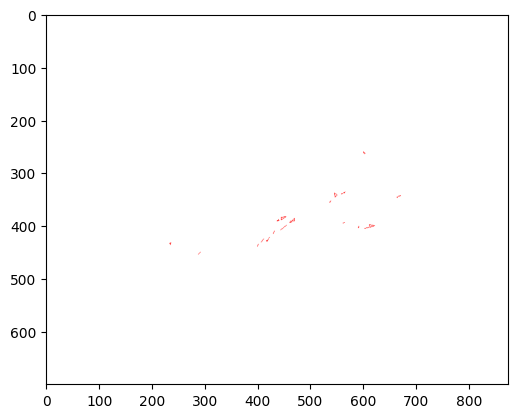

In [41]:
blank_img = np.ones(list(mask.shape) + [3], dtype=np.uint8) * 255

cv2.drawContours(image=blank_img, contours=simplified_contours, contourIdx=-1, color=(255, 0, 0))

plt.imshow(blank_img)
plt.show()

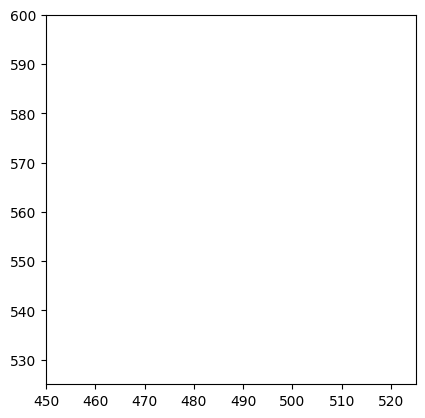

In [42]:
plt.imshow(blank_img)
plt.xlim((450, 525))
plt.ylim((525, 600))
plt.show()